# **Step 1 : Load Tools**

In [ ]:
# from google.colab import drive
# drive.mount('/content/Bank_note_prediction')

Mounted at /content/Bank_note_prediction


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Keras Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# **Step 2 : Load Dataset**

# **About Dataset**
# **Context**
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original notes to create discrepancies in the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features.

# **Motivation**
Despite a decrease in the use of currency due to the recent growth in the use of electronic transactions, cash transactions remain very important in the global market. Banknotes are used to carry out financial activities. To continue with smooth cash transactions, the entry of forged banknotes in circulation should be preserved. There has been a drastic increase in the rate of fake notes in the market. Fake money is an imitation of genuine notes and is created illegally for various motives. These fake notes are created in all denominations which brings the financial market of the country to a low level. The various advancements in the field of scanners and copy machines have led the miscreants to create copies of banknotes. It is difficult for human-eye to recognize a fake note because they are created with great accuracy to look alike a genuine note. Security aspects of banknotes have to be considered and security features are to be introduced to mitigate fake currency. Hence, there is a dire need for banks and ATMs to implement a system that classifies a note as genuine or fake.

# **Objective**
Being a Data Science Enthusiast, you committed yourself to use the power of Data Science and coming up with an efficient model that accurately predicts if a note is genuine or not.

# **About the Data**
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool was used to extract features from images.

# **Data Description**

VWTI: Variance of Wavelet Transformed Image

SWTI: Skewness of Wavelet Transformed Image

CWTI: Curtosis of Wavelet Transformed Image

EI: Entropy of Image

Class: Class (1: genuine, 0: forged)

In [3]:
#Load Dataset
data = pd.read_csv("/content/Bank_note_prediction/MyDrive/Datasets main/bank fake vs real notes/data/train.csv")
data

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


# **Step 3 : Data Preprocessing**

In [4]:
# Separate features and target
X = data[['VWTI', 'SWTI', 'CWTI', 'EI']]  # Adjust these columns to your dataset
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Ensure target is in binary format (0 or 1 for binary classification)
# No need for one-hot encoding in binary classification
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (700, 4), y_train shape: (700,)
X_val shape: (176, 4), y_val shape: (176,)
X_test shape: (220, 4), y_test shape: (220,)


# **Step 4 : Build the ANN Model**

In [5]:
X_train.shape[1]

4

In [6]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),  # Another Dropout layer
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=5,          # Stops training after 5 epochs with no improvement
    restore_best_weights=True  # Restores the best model weights
)

# Check model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

# **Step 5 : Train The Model**

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]  # Use early stopping callback
)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6462 - loss: 0.6555 - val_accuracy: 0.9091 - val_loss: 0.5350
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8622 - loss: 0.5192 - val_accuracy: 0.9091 - val_loss: 0.3725
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8872 - loss: 0.3597 - val_accuracy: 0.9261 - val_loss: 0.2234
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9407 - loss: 0.2357 - val_accuracy: 0.9602 - val_loss: 0.1248
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9650 - loss: 0.1545 - val_accuracy: 0.9773 - val_loss: 0.0770
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9759 - loss: 0.0951 - val_accuracy: 0.9830 - val_loss: 0.0493
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9751 - loss: 0.0853 - val_accuracy: 0.9830 - val_loss: 0.0420
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9622 - loss: 0.0822 - val_accuracy: 0.9830 - val_los

# **Step 6 : Evaluate the Model**

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9965 - loss: 0.0120 
Test Loss: 0.0148, Test Accuracy: 0.9955


# **7. Generate Evaluation Metrics**

In [9]:
# You can also generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)


print("Classification Report:")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        85

    accuracy                           1.00       220
   macro avg       0.99      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



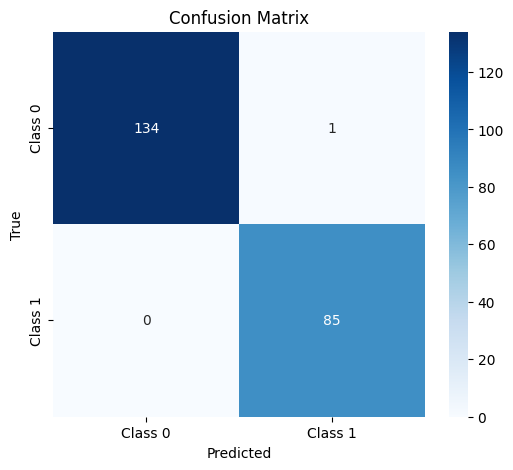

In [10]:
# Plot confusion matrix using seaborn heatmap
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Step 8: Prediction System**

In [11]:
import numpy as np


# Define the make_prediction function
def make_prediction(input_data):
    # Preprocess input data (apply scaling)
    # Use the pre-loaded scaler instead of creating a new one
    input_data_scaled = scaler.transform(input_data)  # Use transform instead of fit_transform

    # Use the trained model to predict the class
    predictions = model.predict(input_data_scaled)

    # Convert prediction to binary (0 or 1)
    predicted_classes = (predictions > 0.5).astype(int)

    # Return the prediction as a string
    if predicted_classes[0] == 1:
        return "Real"
    else:
        return "Fake"

In [12]:
# Example input data for prediction (replace with actual form data or array)
input_data = np.array([[1.5, 2.3, 3.4, 0.7]])  # Example data

# Get the prediction
result = make_prediction(input_data)
print(result)  # Will print "Real" or "Fake" based on the prediction

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Fake


In [13]:
# Example input data for prediction (replace with actual form data or array)
input_data = np.array([[-3.9411, -12.8792,  13.0597,  -3.3125]])  # Example data

# Get the prediction
result = make_prediction(input_data)
print(result)  # Will print "Real" or "Fake" based on the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Real



# **Step 9: Save Model**

In [14]:
import pickle

model.save('models/model.h5')
# Save the scaler using pickle
with open('models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)